In [1]:
import numpy as np
from game import *
from q_learning import q_learning, double_q_learning
from sarsa import sarsa



In [ ]:
from utils import *
import pandas as pd
from tuning import parallel_tuning, evaluate_TD
# hyperparameter tuning for sarsa (manual grid search)
env = MDPGame(random_x=True)
env.load_level(medium_level)

n = 10

parameters = {
    "episodes" : [500, 1000, 1500, 2000, 2500, 3000],
    "alpha" : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    "gamma" : [0.9, 0.95, 0.98, 0.99, 0.999],
    "epsilon" : [0.05, 0.1, 0.125, 0.15, 0.2]
}

result = parallel_tuning(env, sarsa, evaluate_TD, parameters, n)
df = pd.DataFrame(result)

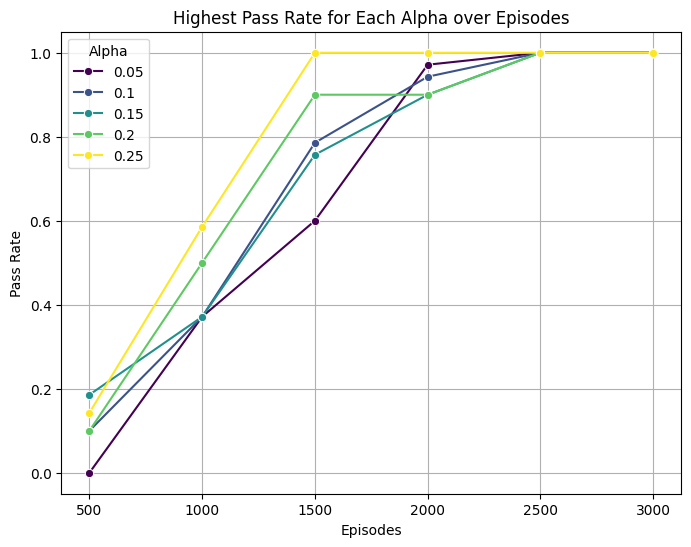

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# plt.figure(figsize=(8, 6))
# sns.lineplot(data=df, x='episodes', y='pass_rate', hue='alpha', marker='o', palette='viridis', ci=None)

# plt.xlabel('Episodes')
# plt.ylabel('Pass Rate')
# plt.title('Pass Rate vs. Episodes depending on alpha')
# plt.legend(title='Alpha')
# plt.grid(True)
# plt.show()

df_max_passrate = df.groupby(['alpha', 'episodes'], as_index=False)['pass_rate'].max()

# Plot the results
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_max_passrate, x='episodes', y='pass_rate', hue='alpha', marker='o', palette='viridis')

plt.xlabel('Episodes')
plt.ylabel('Pass Rate')
plt.title('Highest Pass Rate for Each Alpha over Episodes')
plt.legend(title='Alpha')
plt.grid(True)
plt.show()


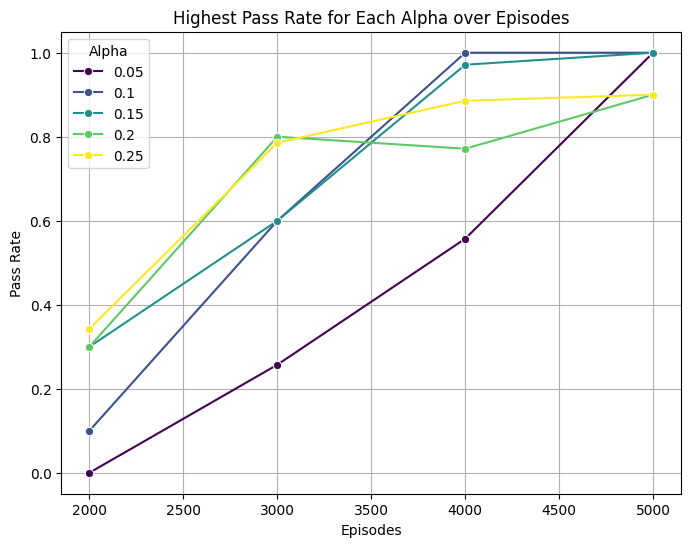